In [23]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Costruindo o DataFrame

Importando os dados dos útimos 20 anos

In [24]:
def importa_dado(nome_do_ativo, tempo):
    ativo = yf.Ticker(nome_do_ativo)
    
    return ativo.history(period=tempo)

In [25]:
periodo_da_analise = '20y'

df_ibov = importa_dado('^BVSP', periodo_da_analise)
df_dolar = importa_dado('BRL=X', periodo_da_analise)
df_euro = importa_dado('EURBRL=X', periodo_da_analise)
df_petro = importa_dado('PETR4.SA', periodo_da_analise)

Costruindo o DataFrame

OBS: Ler 1* no README

In [26]:
# Transformando o indice de Timestamp para Date
# 1*

def arruma_index(dataframe):
    new_index = []

    for timestamp in dataframe.index:
         new_index.append(timestamp.date())

    return new_index

df_ibov.index = arruma_index(df_ibov)
df_dolar.index = arruma_index(df_dolar)
df_euro.index = arruma_index(df_euro)
df_petro.index = arruma_index(df_petro)

In [27]:
dados = {
    'Ibov' : df_ibov['High'], 
    'Dólar' : df_dolar['High'], 
    'Euro' : df_euro['High'], 
    'Petro' : df_petro['High']
    }

df = pd.DataFrame(dados)
df = df.dropna()

df.head().round(3)

,Ibov,Dólar,Euro,Petro
2003-12-01,20522.0,2.946,3.462,2.712
2003-12-02,20630.0,2.931,3.415,2.744
2003-12-03,20586.0,2.936,3.480,2.744
2003-12-04,20570.0,2.943,3.460,2.726
2003-12-05,20922.0,2.948,3.479,2.742


# Estatistica básica

In [28]:
df.describe().round(2)

,Ibov,Dólar,Euro,Petro
count,4312.00,4312.00,4312.00,4312.00
mean,68364.58,3.06,3.67,9.91
std,25542.18,1.26,1.26,4.80
min,18387.00,1.54,2.18,1.88
25%,51918.75,2.00,2.64,7.05
50%,62159.00,2.72,3.28,8.99
75%,84565.25,3.87,4.38,12.22
max,131190.00,5.97,7.00,33.59


In [29]:
correlacao = df.corr().round(3)
correlacao['Ibov']

Ibov     1.000
Dólar    0.718
Euro     0.733
Petro    0.718
Name: Ibov, dtype: float64

# Gráficos 

- Variação conforme o tempo
- Boxplot
- Boxplot sem Outliers
- Histograma 
- Gráficos de dispersão

In [30]:
# Definindo padrão seaborn

sns.set_palette("Accent")
sns.set_style("darkgrid")

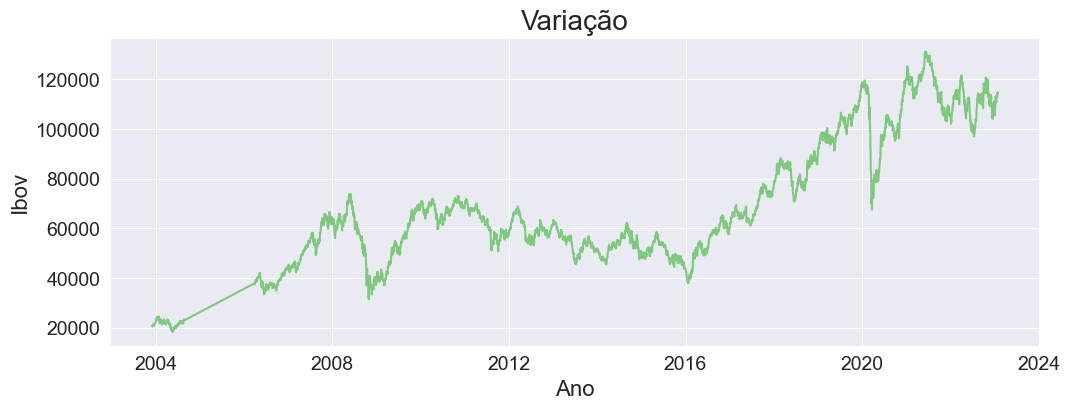

In [31]:
fig, grafico_historico_ibov = plt.subplots(figsize=(12,4))

grafico_historico_ibov.set_title('Variação', fontsize=20)
grafico_historico_ibov.set_ylabel('Ibov', fontsize=16)
grafico_historico_ibov.set_xlabel('Ano', fontsize=16)

grafico_historico_ibov = df['Ibov'].plot(fontsize=14)

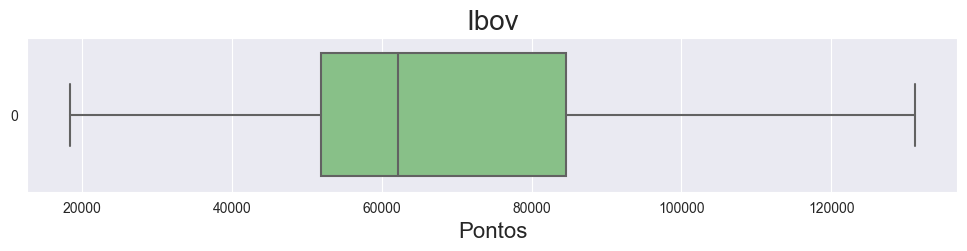

In [32]:
boxplot_ibov = sns.boxplot(data=df['Ibov'], orient='h')
boxplot_ibov.set_title('Ibov', fontsize=20)
boxplot_ibov.set_xlabel('Pontos', fontsize=16)
boxplot_ibov.figure.set_size_inches(12, 2)

Removendo os Outliers

In [33]:
def remove_outlier(nome_do_ativo):
    Q1 = df[nome_do_ativo].quantile(0.25)
    Q3 = df[nome_do_ativo].quantile(0.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - (1.5 * IIQ)
    limite_superior = Q3 + (1.5 * IIQ)

    selecao = (df[nome_do_ativo] >= limite_inferior) & (df[nome_do_ativo] <= limite_superior)

    return selecao

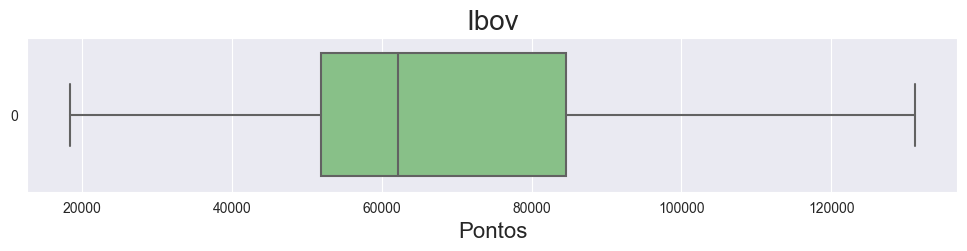

In [34]:
boxplot_ibov_sem_outlier = sns.boxplot(data=df['Ibov'][remove_outlier('Ibov')], orient='h')

boxplot_ibov_sem_outlier.set_title('Ibov', fontsize=20)
boxplot_ibov_sem_outlier.set_xlabel('Pontos', fontsize=16)
boxplot_ibov_sem_outlier.figure.set_size_inches(12, 2)

Text(0.5, 0, 'Pontos')

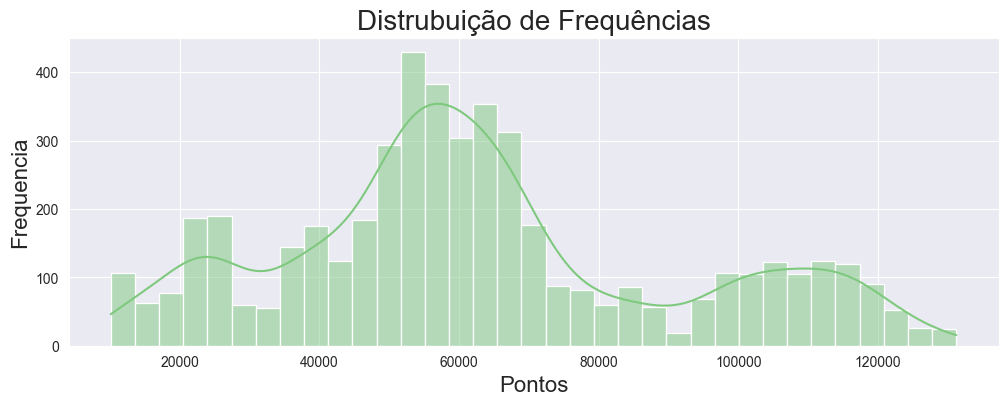

In [35]:
distribuicao_de_frequencia = sns.histplot(dados['Ibov'], kde=True)

distribuicao_de_frequencia.figure.set_size_inches(12,4)
distribuicao_de_frequencia.set_title('Distrubuição de Frequências', fontsize=20)
distribuicao_de_frequencia.set_ylabel('Frequencia', fontsize=16)
distribuicao_de_frequencia.set_xlabel('Pontos', fontsize=16)

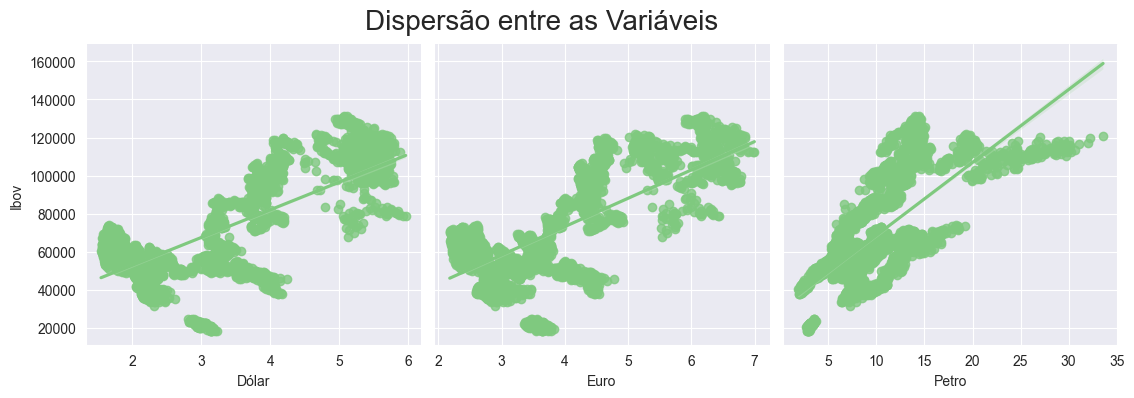

In [36]:
dispersao = sns.pairplot(df, y_vars='Ibov', x_vars=['Dólar', 'Euro', 'Petro'], kind='reg')
dispersao.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
dispersao.figure.set_size_inches(12,4)

# Criando um modelo de regressão

In [66]:
y = df['Ibov']
X = df[['Dólar', 'Euro', 'Petro']]

modelo = LinearRegression().fit(X, y)

Calculando os coeficientes

Yi = B0 + B1 X2 + B2 X3 + B3 X4

In [60]:
r2 = modelo.score(X, y)
print(f'R² = {r2.round(2)}')

R² = 0.78


In [61]:
def previsao_ibov(dolar,euro,petro):
    B0 = modelo.intercept_
    B1 = modelo.coef_[0]
    B2 = modelo.coef_[1]
    B3 = modelo.coef_[2]
    return B0 + B1*dolar + B2*euro + B3*petro

Previsor:

In [62]:
dolar_previsto = 5.5466
euro_previsto = 5.5466
petro_previsto = 25.62
ibov_previsto = previsao_ibov(dolar_previsto, euro_previsto, petro_previsto)

print(f'Provavelmente o IBOV estará {ibov_previsto.round(2)} pontos')


Provavelmente o IBOV estará 129828.78 pontos


# Teste de eficiencia

In [63]:
def testa_previsor(df):    
    testes_positivos_exato = []
    testes_positivos_margem = []

    for elemento in range(len(df)):

        linha = df.iloc[[elemento]]
        
        ibov = linha['Ibov']
        dolar = linha['Dólar']
        euro = linha['Euro']
        petro = linha['Petro']

        ibov_previsto = previsao_ibov(dolar[0], euro[0], petro[0])

        if (ibov_previsto == ibov[0]):
            testes_positivos_exato.append(1)
        
        if (ibov[0]*0.9 <= ibov_previsto <= ibov[0]*1.1):
           testes_positivos_margem.append(1)
    
    porcentagem_total = (len(testes_positivos_exato) + len(testes_positivos_margem)) / len(df) 
    porcentagem_exata = len(testes_positivos_exato) / len(df)
    porcentagem_margem = len(testes_positivos_margem) / len(df)

    lista_resultados = [porcentagem_total, porcentagem_exata, porcentagem_margem]
    
    return lista_resultados

In [64]:
lista_resultados = testa_previsor(df)

porcentagem_total = lista_resultados[0]
porcentagem_exata = lista_resultados[1]
porcentagem_margem = lista_resultados[2]


OBS: Ler 2* no README

In [65]:
print(f'Porcentagem de acertos = {round(porcentagem_total*100, 2)}%')
print(f'Porcentagem de acertos exatos = {round(porcentagem_exata.__round__(2)*100, 2)}%')
print(f'Porcentagem de acertos com margem de 10% = {round(porcentagem_margem.__round__(2)*100, 2)}%')

Porcentagem de acertos = 37.85%
Porcentagem de acertos exatos = 0.0%
Porcentagem de acertos com margem de 10% = 38.0%
